# Customer Personality Analysis

![Image Description](Personality_Analysis.jpg)


*Customer Personality Analysis is crucial for understanding and catering to the diverse needs of a company's customer base. By delving into customer behaviors, preferences, and concerns, businesses can tailor products and marketing strategies to specific customer segments. This targeted approach maximizes efficiency and effectiveness, allowing businesses to allocate resources wisely and enhance customer satisfaction.*

#### Exploratory Data Analysis

In [58]:
#importing important library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
#loading dataset
data = pd.read_csv("marketing_campaign.csv", sep='\t')

In [60]:
#Dataset Columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [61]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [62]:
#Data Shape and Info
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [64]:
#Handling Missing Values
mean= data['Income'].mean()
data['Income']= data['Income'].fillna(mean)

In [65]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [66]:
#Descriptive Statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Feature Engineering

In [67]:
#Creating new columns for analysis
data['Age']=2024-data['Year_Birth']
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

#### Data Visualization

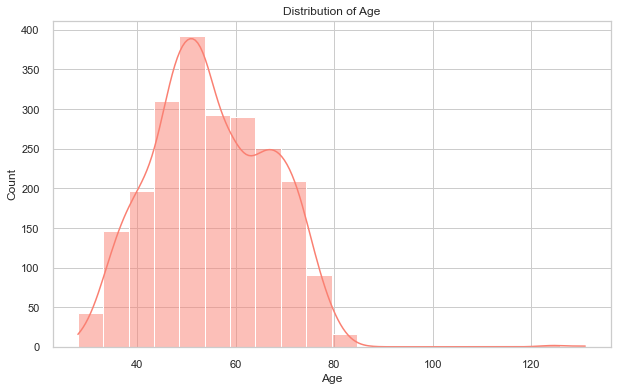

In [68]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Age')
plt.show()

 *As we can see from the age graph, most customers are from the range of 43–56 years old.*

([<matplotlib.patches.Wedge at 0x25f80556910>,
 [Text(-0.010799092464652335, 1.099946989450828, 'Graduation'),
  Text(-0.840441051704004, -0.7096892549635142, 'PhD'),
  Text(0.3574766803682644, -1.0402934311976049, 'Master'),
  Text(0.9970110351959686, -0.4647246450291434, '2n Cycle'),
  Text(1.09684684539309, -0.08322858734369598, 'Basic')],
 [Text(-0.005890414071628546, 0.5999710851549971, '50.3%'),
  Text(-0.45842239183854755, -0.38710322998009866, '21.7%'),
  Text(0.1949872802008715, -0.567432780653239, '16.5%'),
  Text(0.5438242010159828, -0.2534861700158964, '9.1%'),
  Text(0.59828009748714, -0.04539741127837962, '2.4%')])

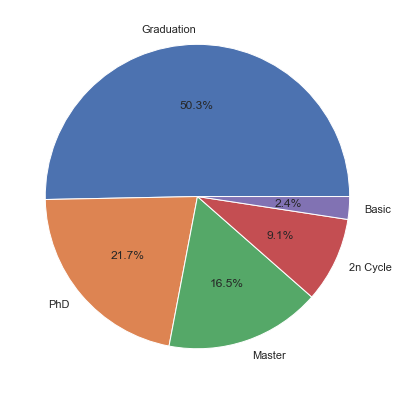

In [69]:
#Education Distribution
plt.figure(figsize =(7,7))
ed = data['Education'].value_counts()
plt.pie(ed, autopct='%.1f%%',labels=[ed.index[0],ed.index[1],ed.index[2],ed.index[3],ed.index[4]])

*Based on the education graph, most customers comes from the graduated education background.*

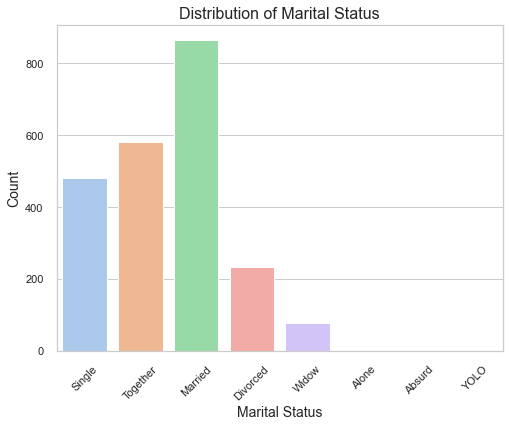

In [70]:
#Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=data, palette='pastel')
plt.title("Distribution of Marital Status", fontsize=16)
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


*Based on the marital status graph, most customers are already married.*

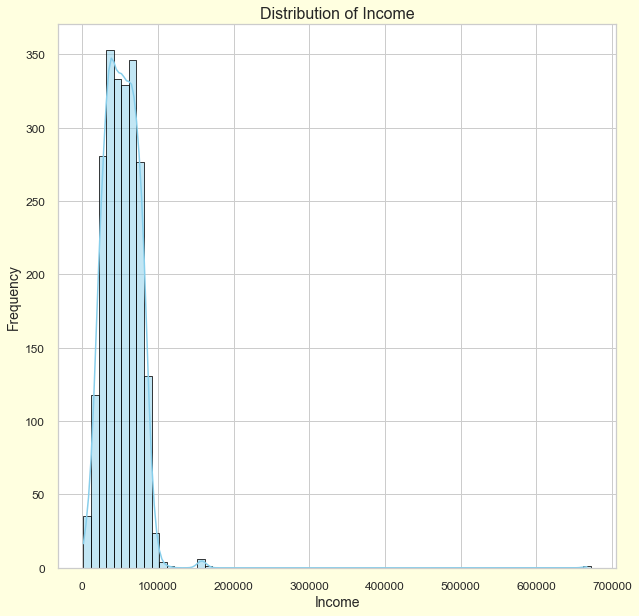

In [71]:
# Income Distribution
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')

ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True, color='skyblue', edgecolor='black')
ax.set_title('Distribution of Income', fontsize=16)
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

*As we can see from the income graph, most customers have the income range of 30000–800000.*

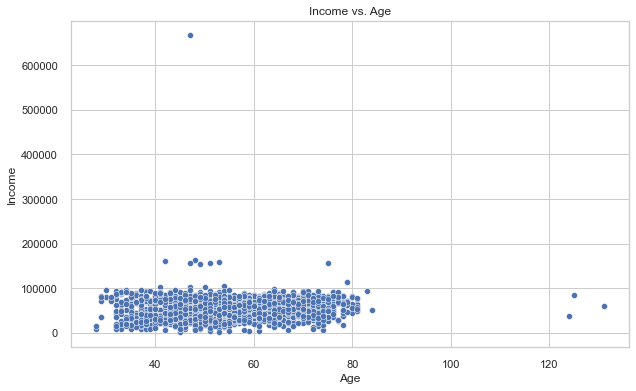

In [72]:
# Income vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=data)
plt.title('Income vs. Age')
plt.show()

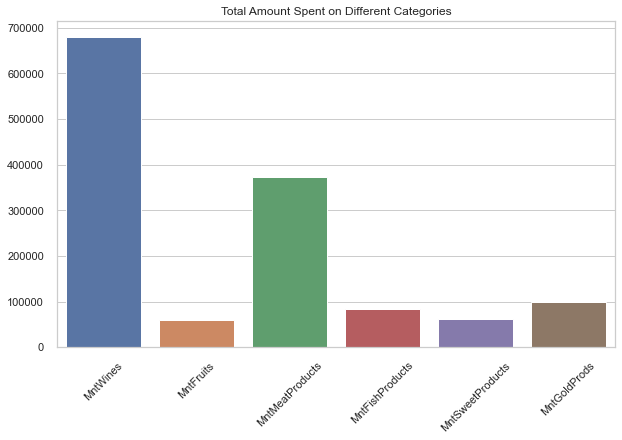

In [73]:
# Total Amount Spent on Different Categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=data[categories].sum().values)
plt.title('Total Amount Spent on Different Categories')
plt.xticks(rotation=45)
plt.show()

*The graph indicates that wine accounts for the highest total expenses, suggesting that it is the top-selling product among the items considered.*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AcceptedCmp2'),
  Text(0, 1, 'AcceptedCmp1'),
  Text(0, 2, 'AcceptedCmp3'),
  Text(0, 3, 'AcceptedCmp5'),
  Text(0, 4, 'AcceptedCmp4')])

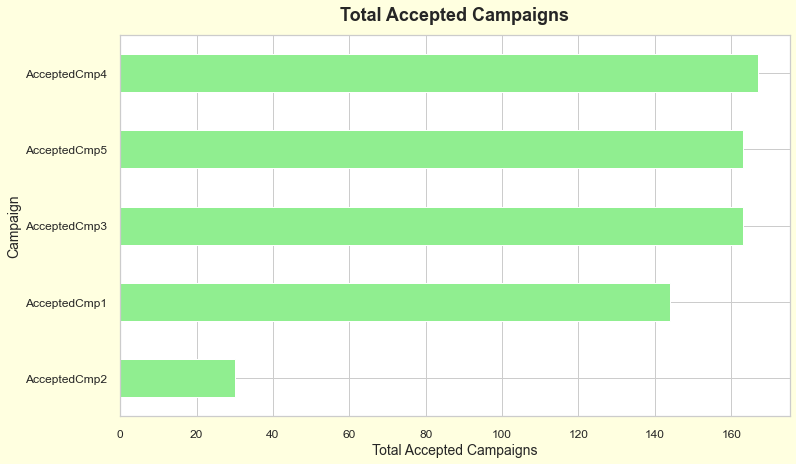

In [74]:
# Calculate Total Accepted Campaigns For Each Campaign
total_accepted_campaigns = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# Plot horizontal bar chart
plt.figure(figsize=(12, 7), facecolor='lightyellow')
total_accepted_campaigns.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Total Accepted Campaigns', fontsize=18, fontweight='semibold', pad=15)
plt.xlabel('Total Accepted Campaigns', fontsize=14)
plt.ylabel('Campaign', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

*The graph shows that as the company runs more marketing campaigns
 More campaigns lead to more acceptances.
 The "Response" campaign had the highest acceptance rate.
 Newer campaigns generally get better responses than older ones.*

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NumDealsPurchases'),
  Text(0, 1, 'NumCatalogPurchases'),
  Text(0, 2, 'NumWebPurchases'),
  Text(0, 3, 'NumStorePurchases')])

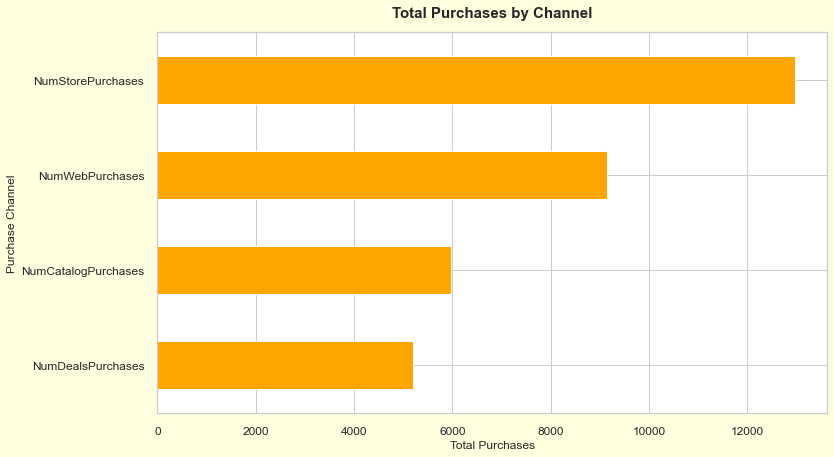

In [75]:
# Calculate Total Purchases for Each Channel
total_purchases = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Plot horizontal bar chart
plt.figure(figsize=(12, 7), facecolor='lightyellow')
total_purchases.sort_values().plot(kind='barh', color='orange')
plt.title('Total Purchases by Channel', fontsize=15, fontweight='semibold', pad=15)
plt.xlabel('Total Purchases', fontsize=12)
plt.ylabel('Purchase Channel', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

*The graph shows that the highest number of purchases were made directly in stores. This suggests that most customers prefer shopping in physical stores over other channels like online, catalog, or deals*

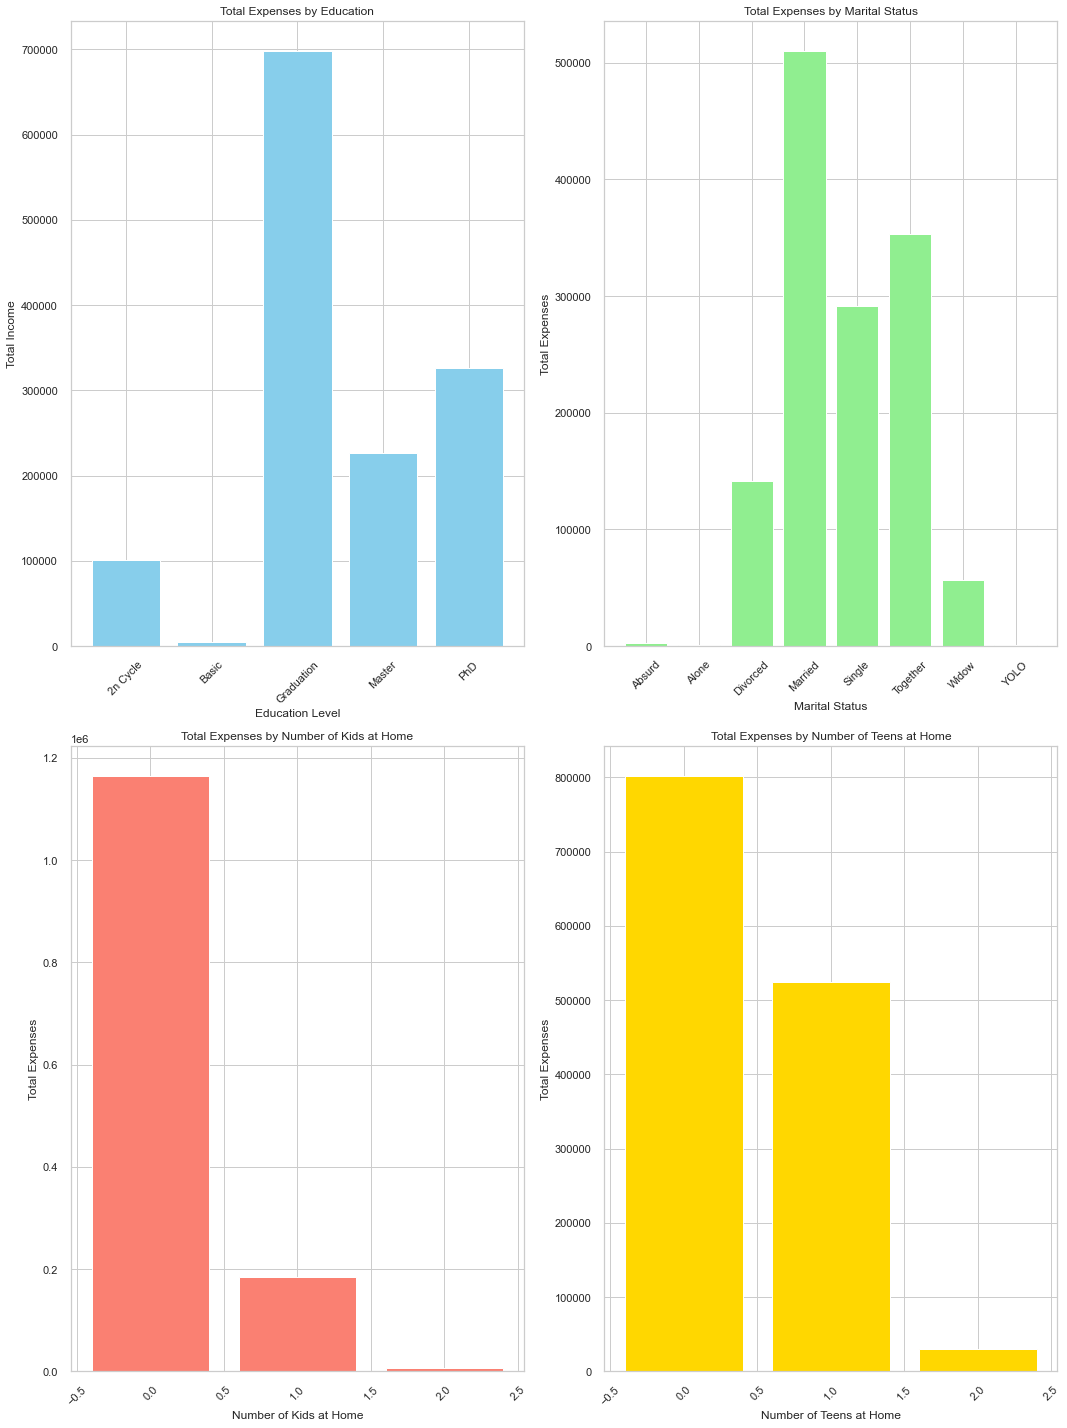

In [76]:
# Total Expenses by Various Groups
education_expenses = data.groupby('Education')['Total_Spent'].sum()
marital_expenses = data.groupby('Marital_Status')['Total_Spent'].sum()
kids_expenses = data.groupby('Kidhome')['Total_Spent'].sum()
teens_expenses = data.groupby('Teenhome')['Total_Spent'].sum()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 20))

# Plot total income by education
axs[0, 0].bar(education_expenses.index, education_expenses.values,color='skyblue')
axs[0, 0].set_title('Total Expenses by Education')
axs[0, 0].set_xlabel('Education Level')
axs[0, 0].set_ylabel('Total Income')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot total income by marital status
axs[0, 1].bar(marital_expenses.index, marital_expenses.values,color='lightgreen')
axs[0, 1].set_title('Total Expenses by Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Total Expenses')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot total income by number of kids at home
axs[1, 0].bar(kids_expenses.index, kids_expenses.values,color='salmon')
axs[1, 0].set_title('Total Expenses by Number of Kids at Home')
axs[1, 0].set_xlabel('Number of Kids at Home')
axs[1, 0].set_ylabel('Total Expenses')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot total income by number of teens at home
axs[1, 1].bar(teens_expenses.index, teens_expenses.values,color='gold')
axs[1, 1].set_title('Total Expenses by Number of Teens at Home')
axs[1, 1].set_xlabel('Number of Teens at Home')
axs[1, 1].set_ylabel('Total Expenses')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

*We observed that married customers and those with a graduate education level contribute the highest income. Additionally, households without kids or teens at home also make substantial contributions. Understanding these trends helps tailor strategies to better serve different customer segments.*

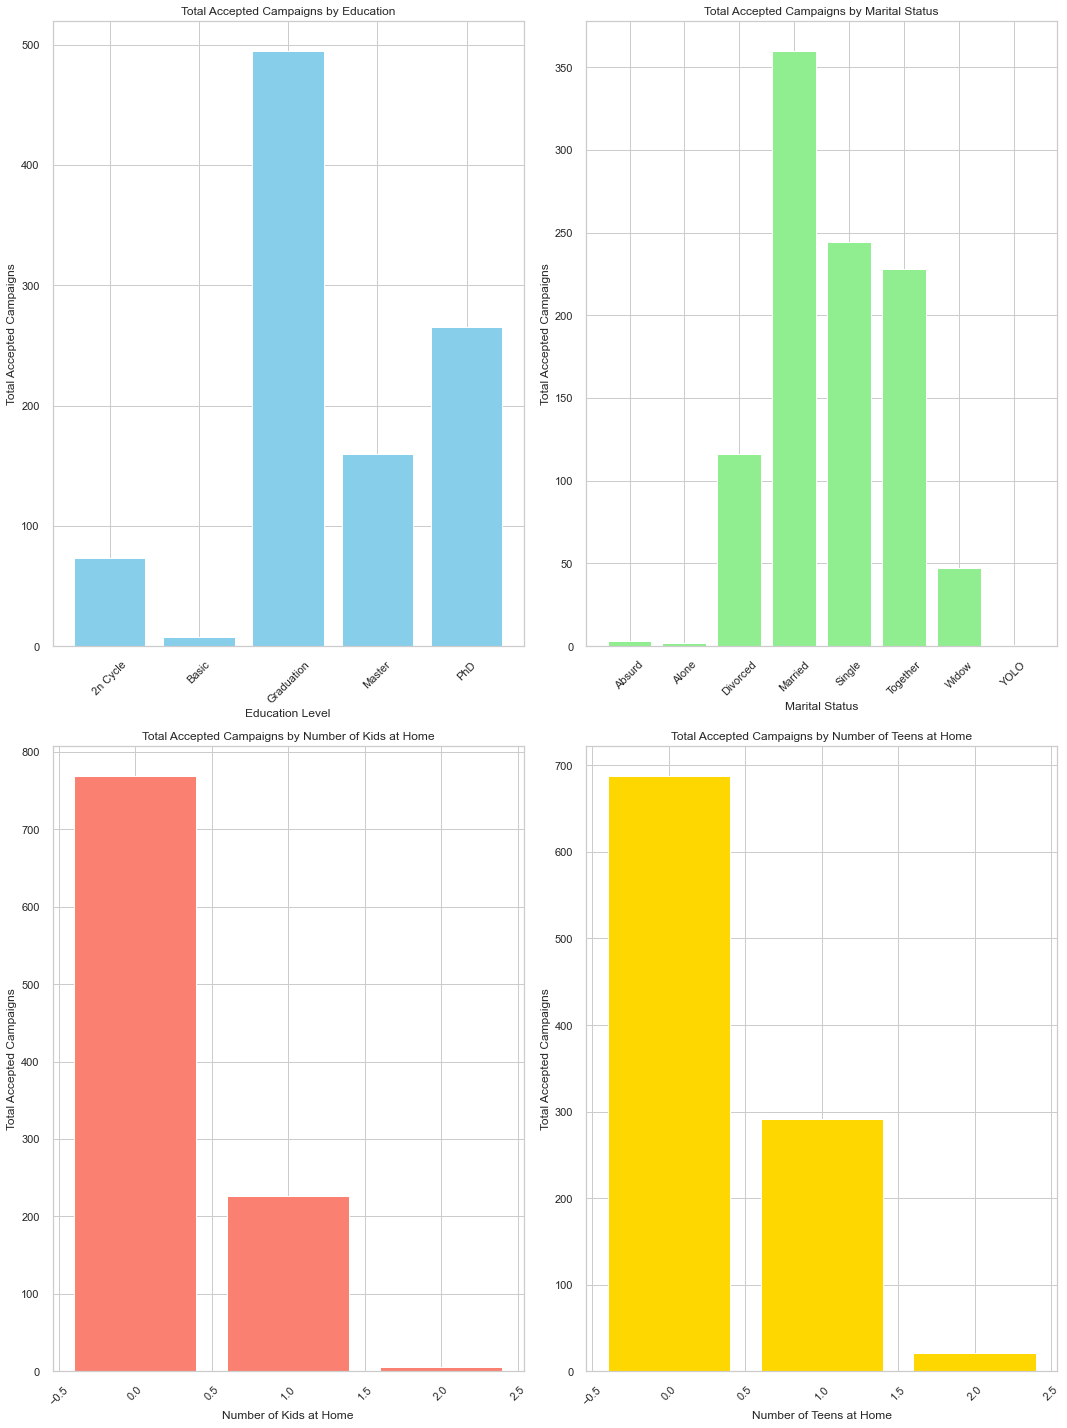

In [77]:
# Total Accepted Campaigns by Various Groups
education_expenses = data.groupby('Education')['Total_Acc_Cmp'].sum()
marital_expenses = data.groupby('Marital_Status')['Total_Acc_Cmp'].sum()
kids_expenses = data.groupby('Kidhome')['Total_Acc_Cmp'].sum()
teens_expenses = data.groupby('Teenhome')['Total_Acc_Cmp'].sum()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 20))

# Plot total accepted campaigns by education
axs[0, 0].bar(education_expenses.index, education_expenses.values, color='skyblue')
axs[0, 0].set_title('Total Accepted Campaigns by Education')
axs[0, 0].set_xlabel('Education Level')
axs[0, 0].set_ylabel('Total Accepted Campaigns')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot total accepted campaigns by marital status
axs[0, 1].bar(marital_expenses.index, marital_expenses.values, color='lightgreen')
axs[0, 1].set_title('Total Accepted Campaigns by Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Total Accepted Campaigns')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot total accepted campaigns by number of kids at home
axs[1, 0].bar(kids_expenses.index, kids_expenses.values, color='salmon')
axs[1, 0].set_title('Total Accepted Campaigns by Number of Kids at Home')
axs[1, 0].set_xlabel('Number of Kids at Home')
axs[1, 0].set_ylabel('Total Accepted Campaigns')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot total accepted campaigns by number of teens at home
axs[1, 1].bar(teens_expenses.index, teens_expenses.values, color='gold')
axs[1, 1].set_title('Total Accepted Campaigns by Number of Teens at Home')
axs[1, 1].set_xlabel('Number of Teens at Home')
axs[1, 1].set_ylabel('Total Accepted Campaigns')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Customers with a graduated educational background accepted the most campaigns.

Married customers accepted the most campaigns.

Customers who don’t have any kids at home accepted the most campaigns.

Customers who don’t have any teens at home accepted the most campaigns.

#### Correlation Analysis

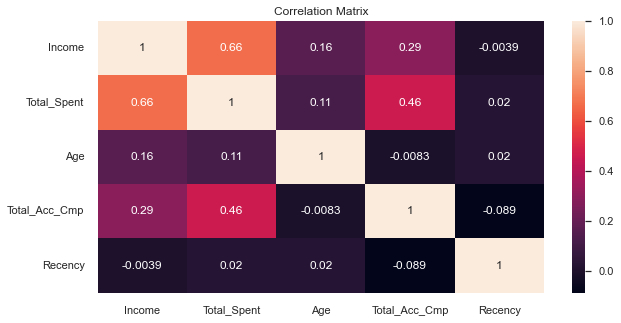

In [78]:
#Heatmap of Correlation Matrix
plt.figure(figsize=(10, 5))
correlation_matrix = data.corr()
sns.heatmap(data[['Income', 'Total_Spent','Age','Total_Acc_Cmp','Recency']]
.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

*above correlation Income and Total Expenses: People with higher incomes tend to spend more money.*
    
*Total Expenses and Total Accepted Campaign: People who spend more money are more likely to participate in more promotional campaigns.*

#### Preprocessing

In [79]:
#Handling Missing Values

52247.25135379061

In [80]:
data=data.dropna()

In [81]:
#Creating features like total money spend, family size
data['Relation'] = data["Marital_Status"].replace({
    "Married": 2,
    "Together": 2,
    "Absurd": 1,
    "Widow": 1,
    "YOLO": 1,
    "Divorced": 1,
    "Single": 1,
    "Alone": 1
})
data['Childern'] = data['Kidhome'] +data["Teenhome"]
data['Family_size'] = data["Relation"] + data["Childern"]


In [82]:
data.drop(['Relation','Childern'], axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spent,Total_Acc_Cmp,Family_size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,67,1617,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,70,27,0,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,59,776,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,40,53,0,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,43,422,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,57,1341,0,3
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,78,444,1,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,43,1241,1,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,68,843,0,3


In [83]:
#label encoding categorical data
from sklearn.preprocessing import LabelEncoder #One hot Encoding 
from sklearn.preprocessing import StandardScaler #Scale the value based on mean of the data

In [84]:
data['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [85]:
lb = LabelEncoder()
data['Education'] =lb.fit_transform(data['Education'])

In [86]:
data['Education']

0       2
1       2
2       2
3       2
4       4
       ..
2235    2
2236    4
2237    2
2238    3
2239    4
Name: Education, Length: 2240, dtype: int32

In [87]:
#Scaling Data
data1 =data.copy()
to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Response']
data1 = data1.drop(to_drop, axis=1)

In [88]:
drop.columns= drop[]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Total_Spent,Total_Acc_Cmp,Relation,Childern,Family_size
0,5524,1957,2,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,3,11,67,1617,1,1,0,1
1,2174,1954,2,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,3,11,70,27,0,1,2,3
2,4141,1965,2,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,3,11,59,776,0,2,0,2
3,6182,1984,2,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,3,11,40,53,0,2,1,3
4,5324,1981,4,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,3,11,43,422,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,3,11,57,1341,0,2,1,3
2236,4001,1946,4,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,3,11,78,444,1,2,3,5
2237,7270,1981,2,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,3,11,43,1241,1,1,0,1
2238,8235,1956,3,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,3,11,68,843,0,2,1,3


In [89]:
scaler = StandardScaler()

#### Clustering Analysis:  K-means Clustering

In [92]:
#we have use Elbob method to find the optimum number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [93]:
data = data.drop(['Marital_Status','Dt_Customer'],axis =1)

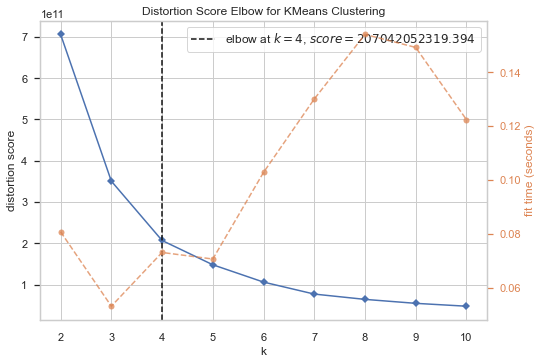

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
em = KElbowVisualizer(KMeans(), K=10)
em.fit(data)
em.show()

*We sea that the optimum number of clusters that should be use is k=4*

*we will use K mean clustering for the operation*


In [95]:
from sklearn.cluster import KMeans

In [96]:
kmc = KMeans(n_clusters=4)
#fit model and predict cluster
pred = kmc.fit_predict(data)
data['Clusters']= pred

In [97]:
data['Clusters']

0       1
1       1
2       0
3       3
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    1
Name: Clusters, Length: 2240, dtype: int32

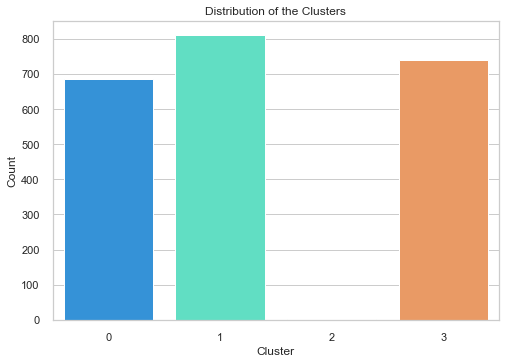

In [98]:
# Assuming 'data' is your DataFrame with a 'Cluster' column
fig = sns.countplot(x=data["Clusters"], palette="rainbow")
fig.set_title("Distribution of the Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

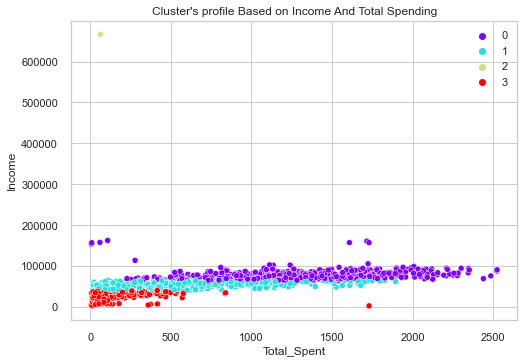

In [99]:
fig = sns.scatterplot(data = data, x= data["Total_Spent"], y=data["Income"],hue=data["Clusters"], palette="rainbow"
                     )
fig.set_title("Cluster's profile Based on Income And Total Spending")
plt.legend()
plt.show()


Conclusion
The clustering is mostly based on income, expenses, number of purchases by it’s category, and total accepted campaign. Education level, marital status, and age did not affect the clustering. So, there are 2 segmentations which is the best number of clustering based on the model. Segment 0 which the customers had low income and low expenses. Segment 1 which the customers had high income and high expenses, which is better to focus on.
